In [58]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# (train data)    , (test data)
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [60]:
X_test.shape

(10000, 32, 32, 3)

In [61]:
y_train.shape      # (rows,columns) -> 50,000 data and 1 row

(50000, 1)

In [62]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

*y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array*

In [63]:
y_train = y_train.reshape(-1,)  # -1 means it will leave that dimension as it is.  
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [64]:
y_test = y_test.reshape(-1,)   

In [65]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [66]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

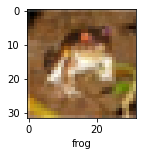

In [67]:
plot_sample(X_train, y_train, 0)

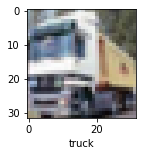

In [68]:
plot_sample(X_train, y_train, 1)

**Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255**

**Normalizing the training data**

In [69]:
X_train = X_train / 255.0
X_test = X_test / 255.0

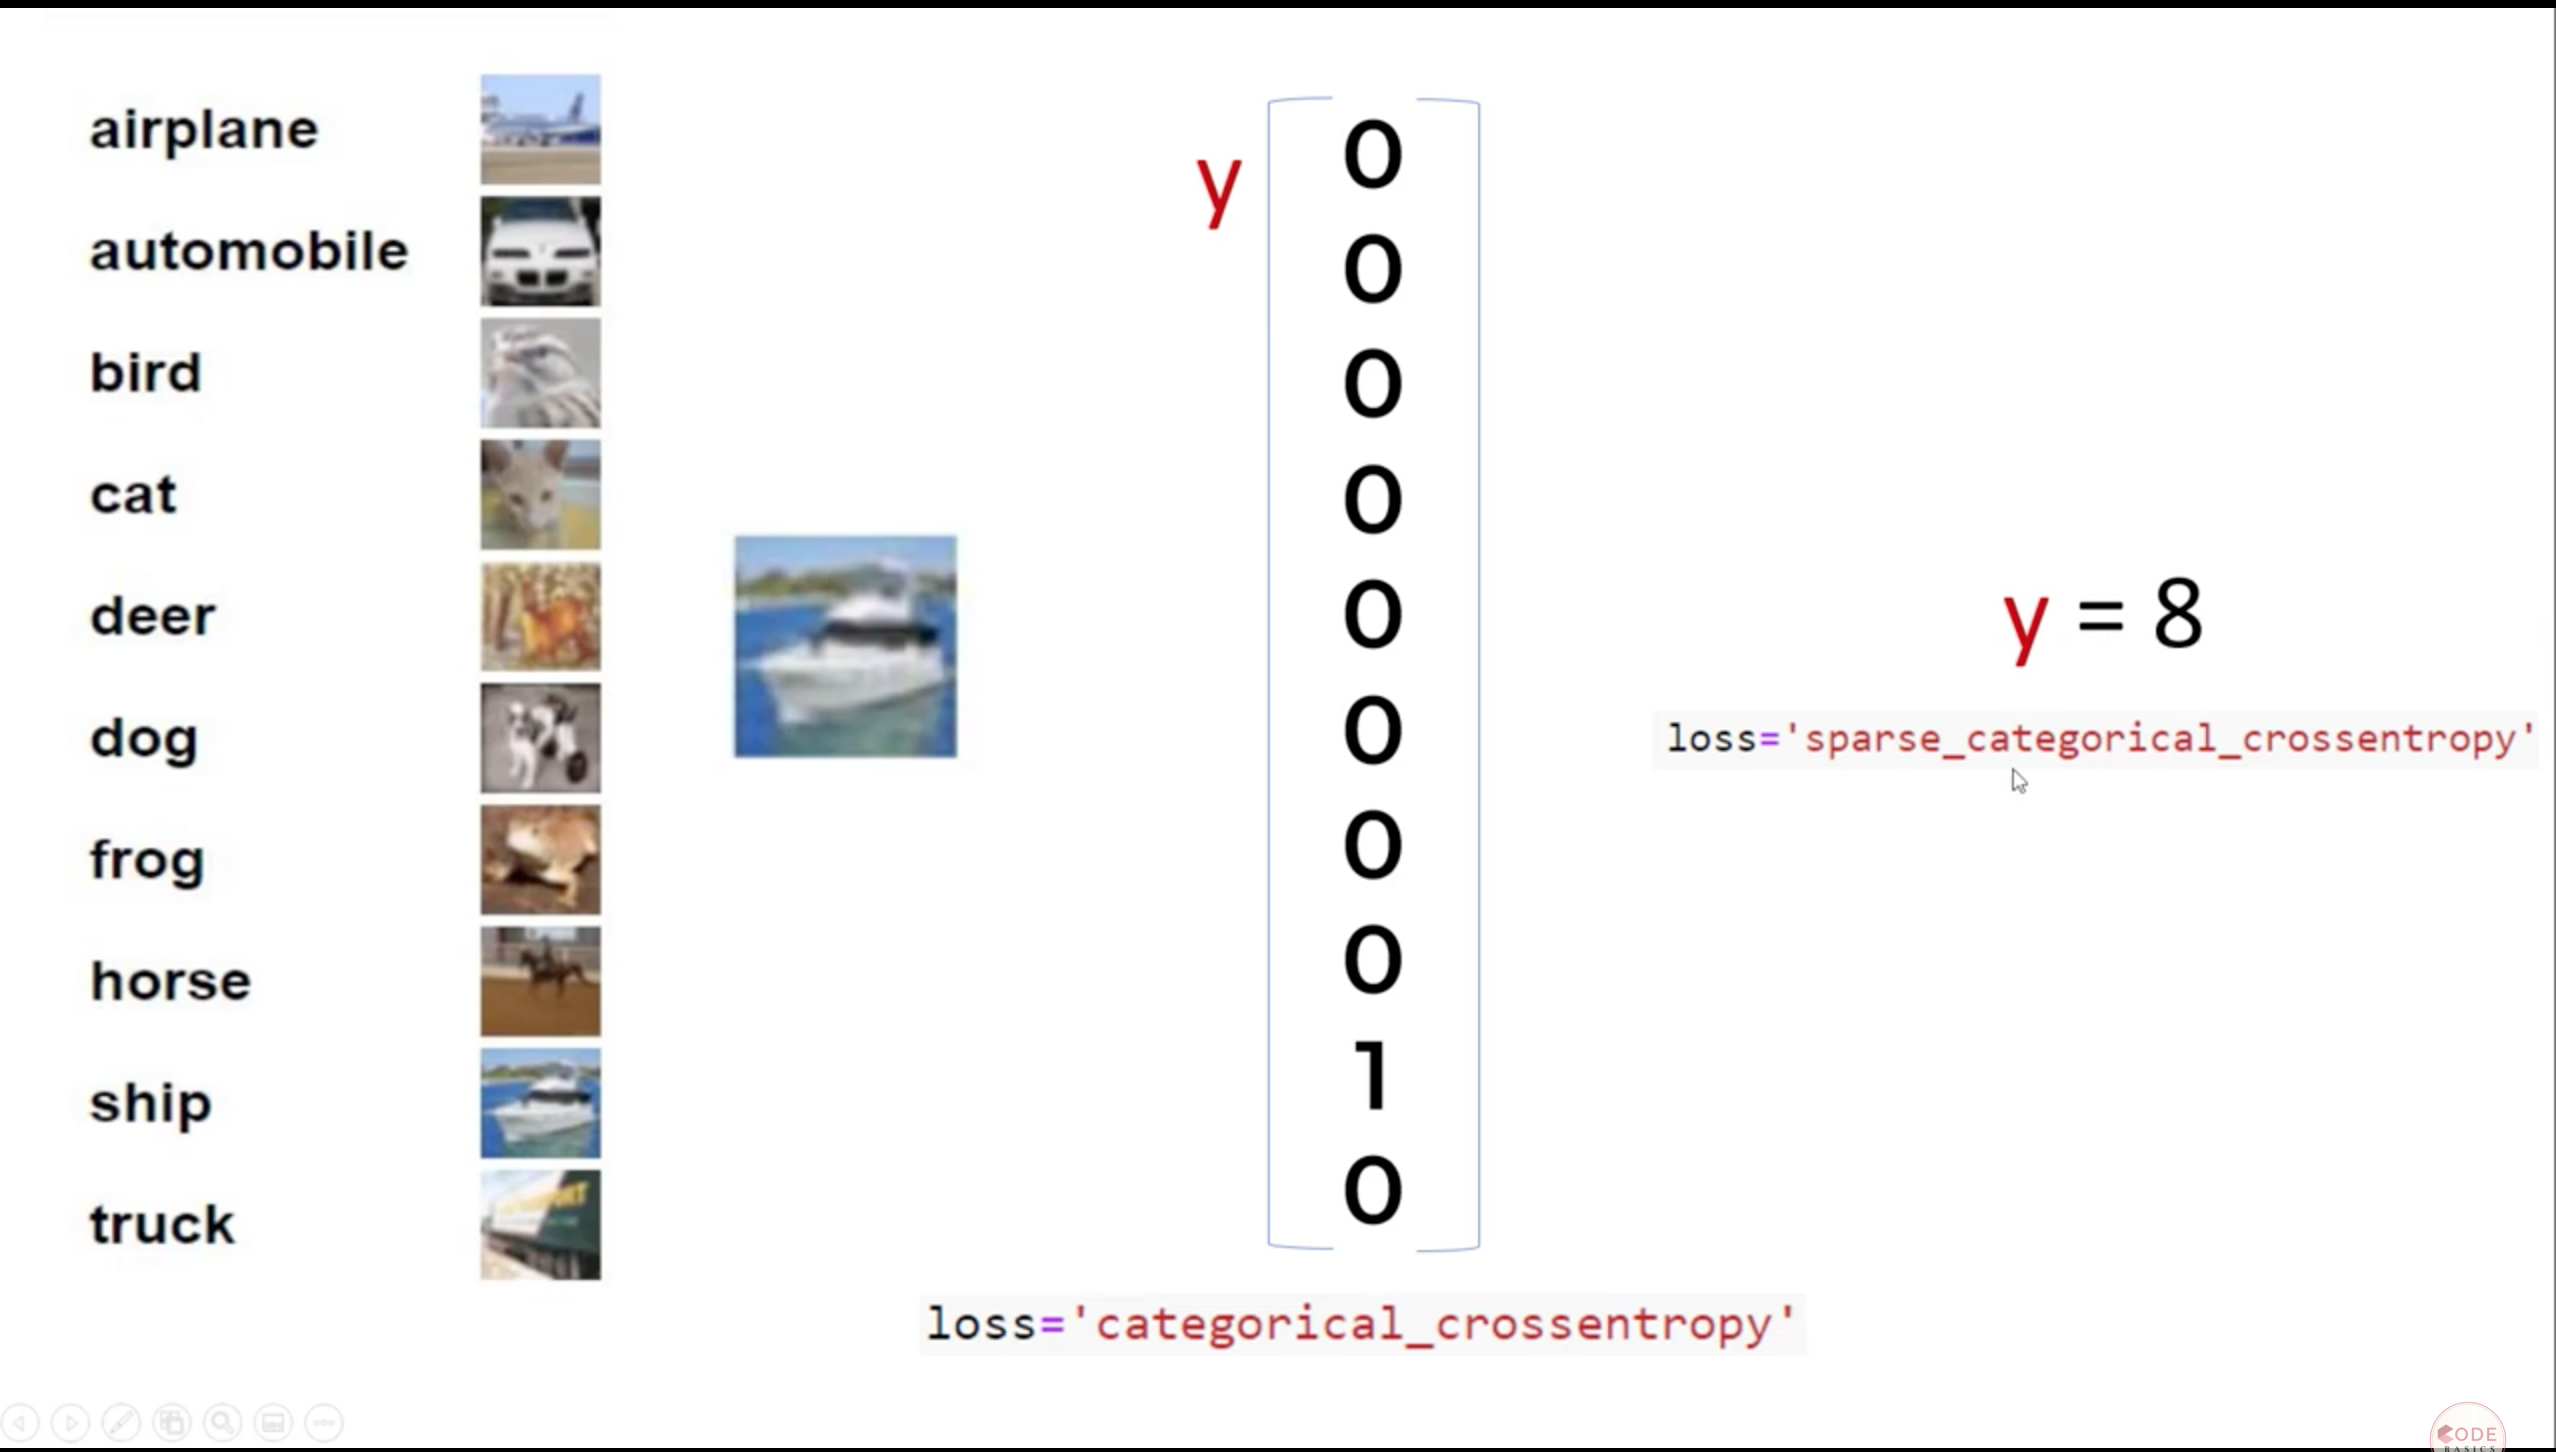

**When the values are OHE then we use "categorical_crossentropy", else we use "sparse_categorical_crossentropy" which is in this case**

**Build simple ANN- Artificial Neural Network for image classification**

In [71]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),   #input layer, flattens 3 dimaenion into 1D
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.8615 - accuracy: 0.3351
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6566 - accuracy: 0.4131
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5710 - accuracy: 0.4451
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5106 - accuracy: 0.4676
Epoch 5/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4600 - accuracy: 0.4839


You can see that at the end of 5 epochs, accuracy is at around 48%

In [72]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.39      0.48      1000
           1       0.51      0.66      0.58      1000
           2       0.31      0.50      0.38      1000
           3       0.39      0.23      0.29      1000
           4       0.48      0.21      0.29      1000
           5       0.55      0.18      0.27      1000
           6       0.57      0.43      0.49      1000
           7       0.25      0.87      0.39      1000
           8       0.74      0.46      0.57      1000
           9       0.76      0.17      0.28      1000

    accuracy                           0.41     10000
   macro avg       0.52      0.41      0.40     10000
weighted avg       0.52      0.41      0.40     10000



In [76]:
y_pred[0]   
#this contains the probability for each images(0-9), we pass it into argmax() it returns the highest value.

array([0.0013544 , 0.00569421, 0.02644771, 0.03482163, 0.00518021,
       0.01676154, 0.01768842, 0.00189745, 0.00239295, 0.00029609],
      dtype=float32)

# CNN

**Step 1 for Feature Extraction :  Filters- Loopy Pattern Detector(MNIST 6,8,9 loops)**
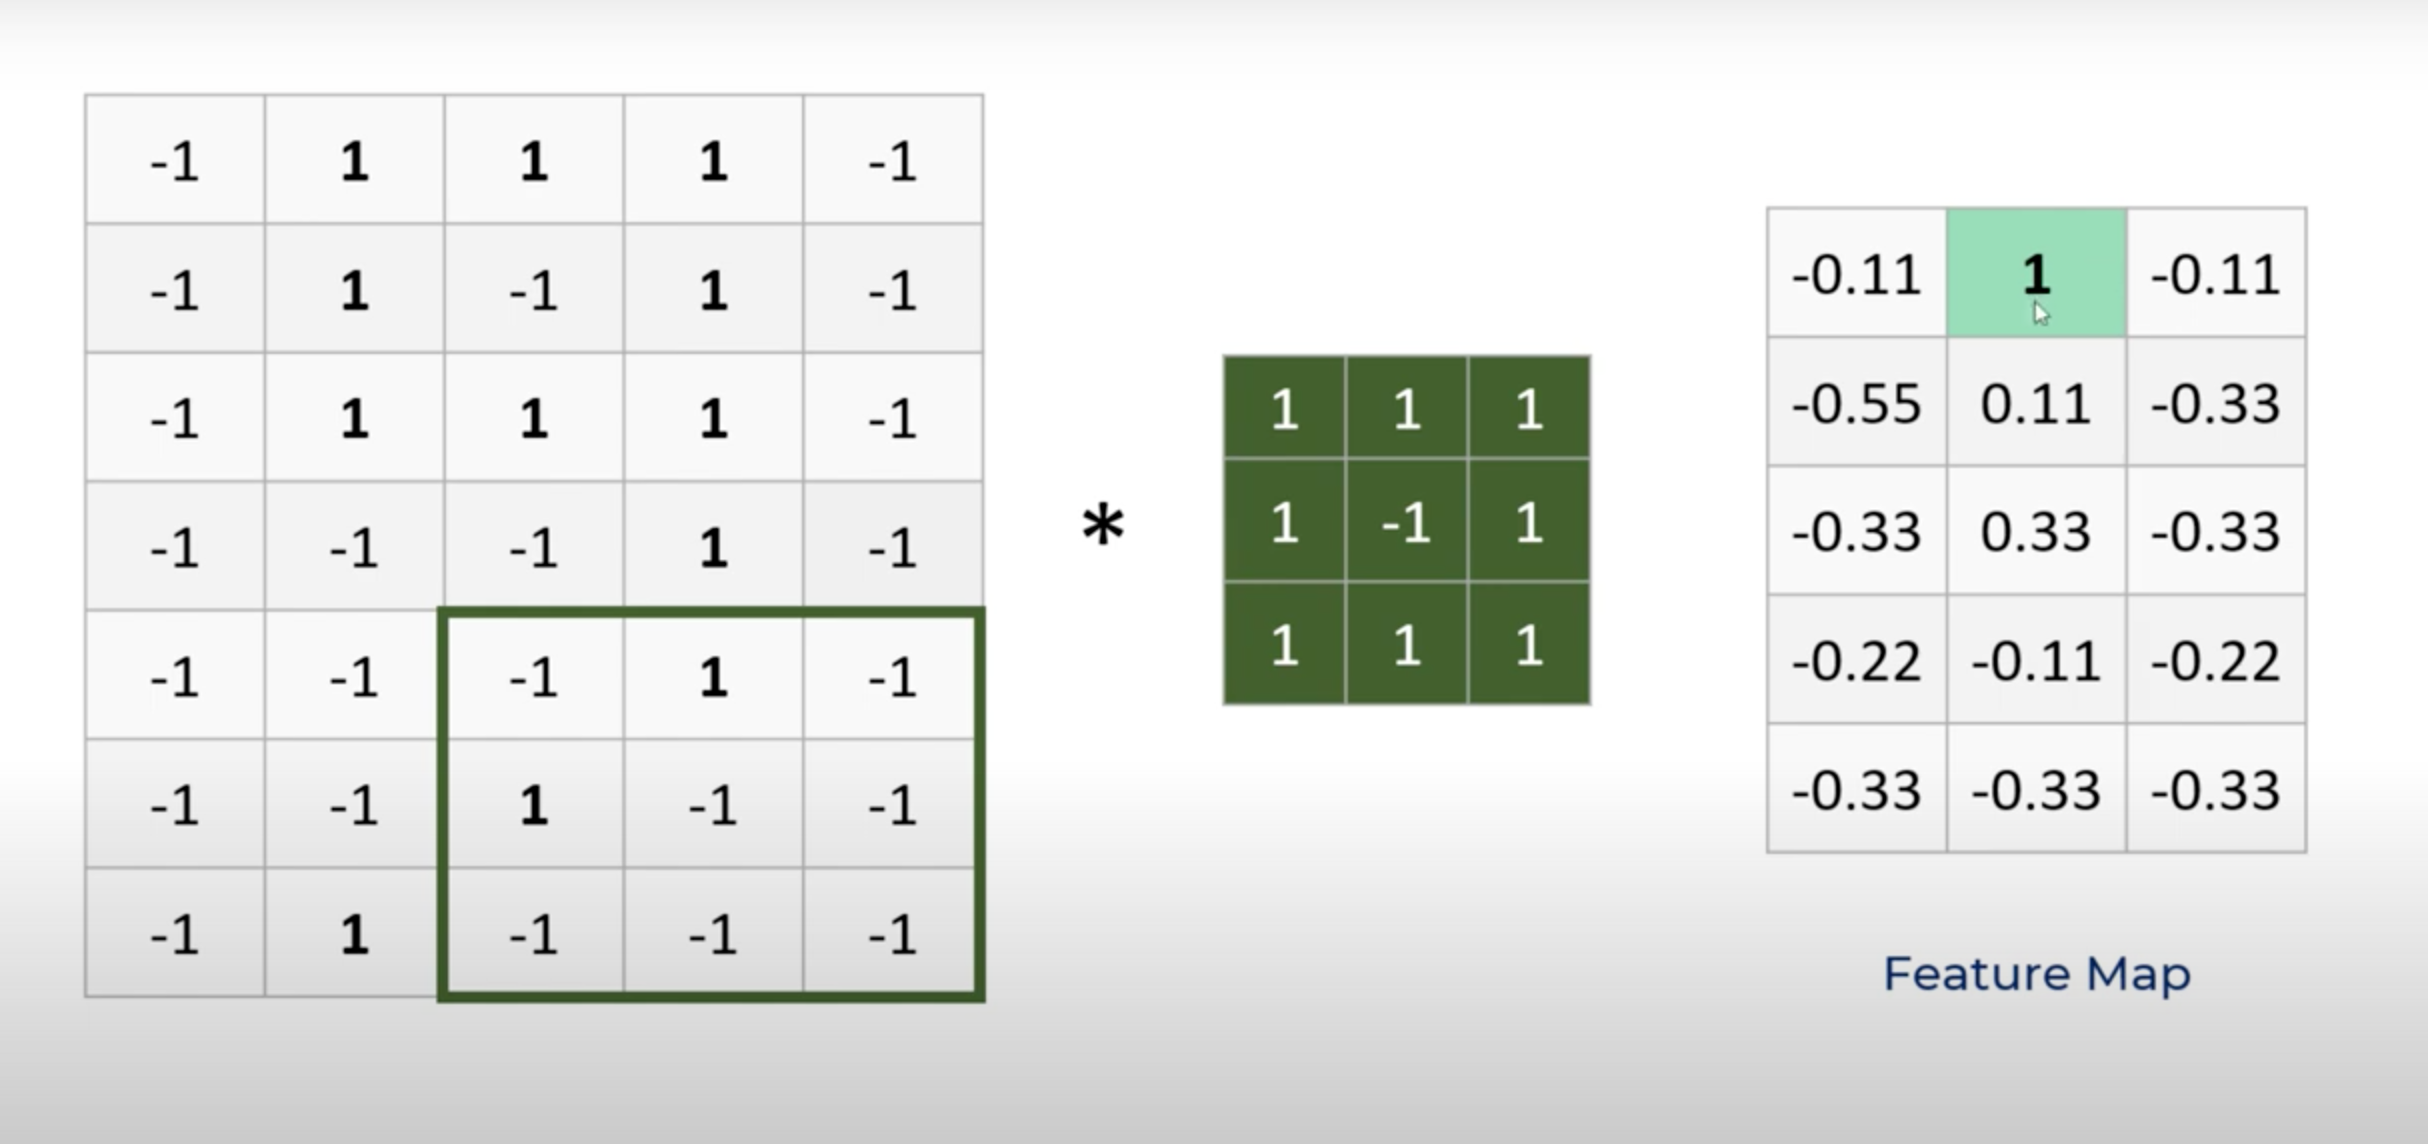

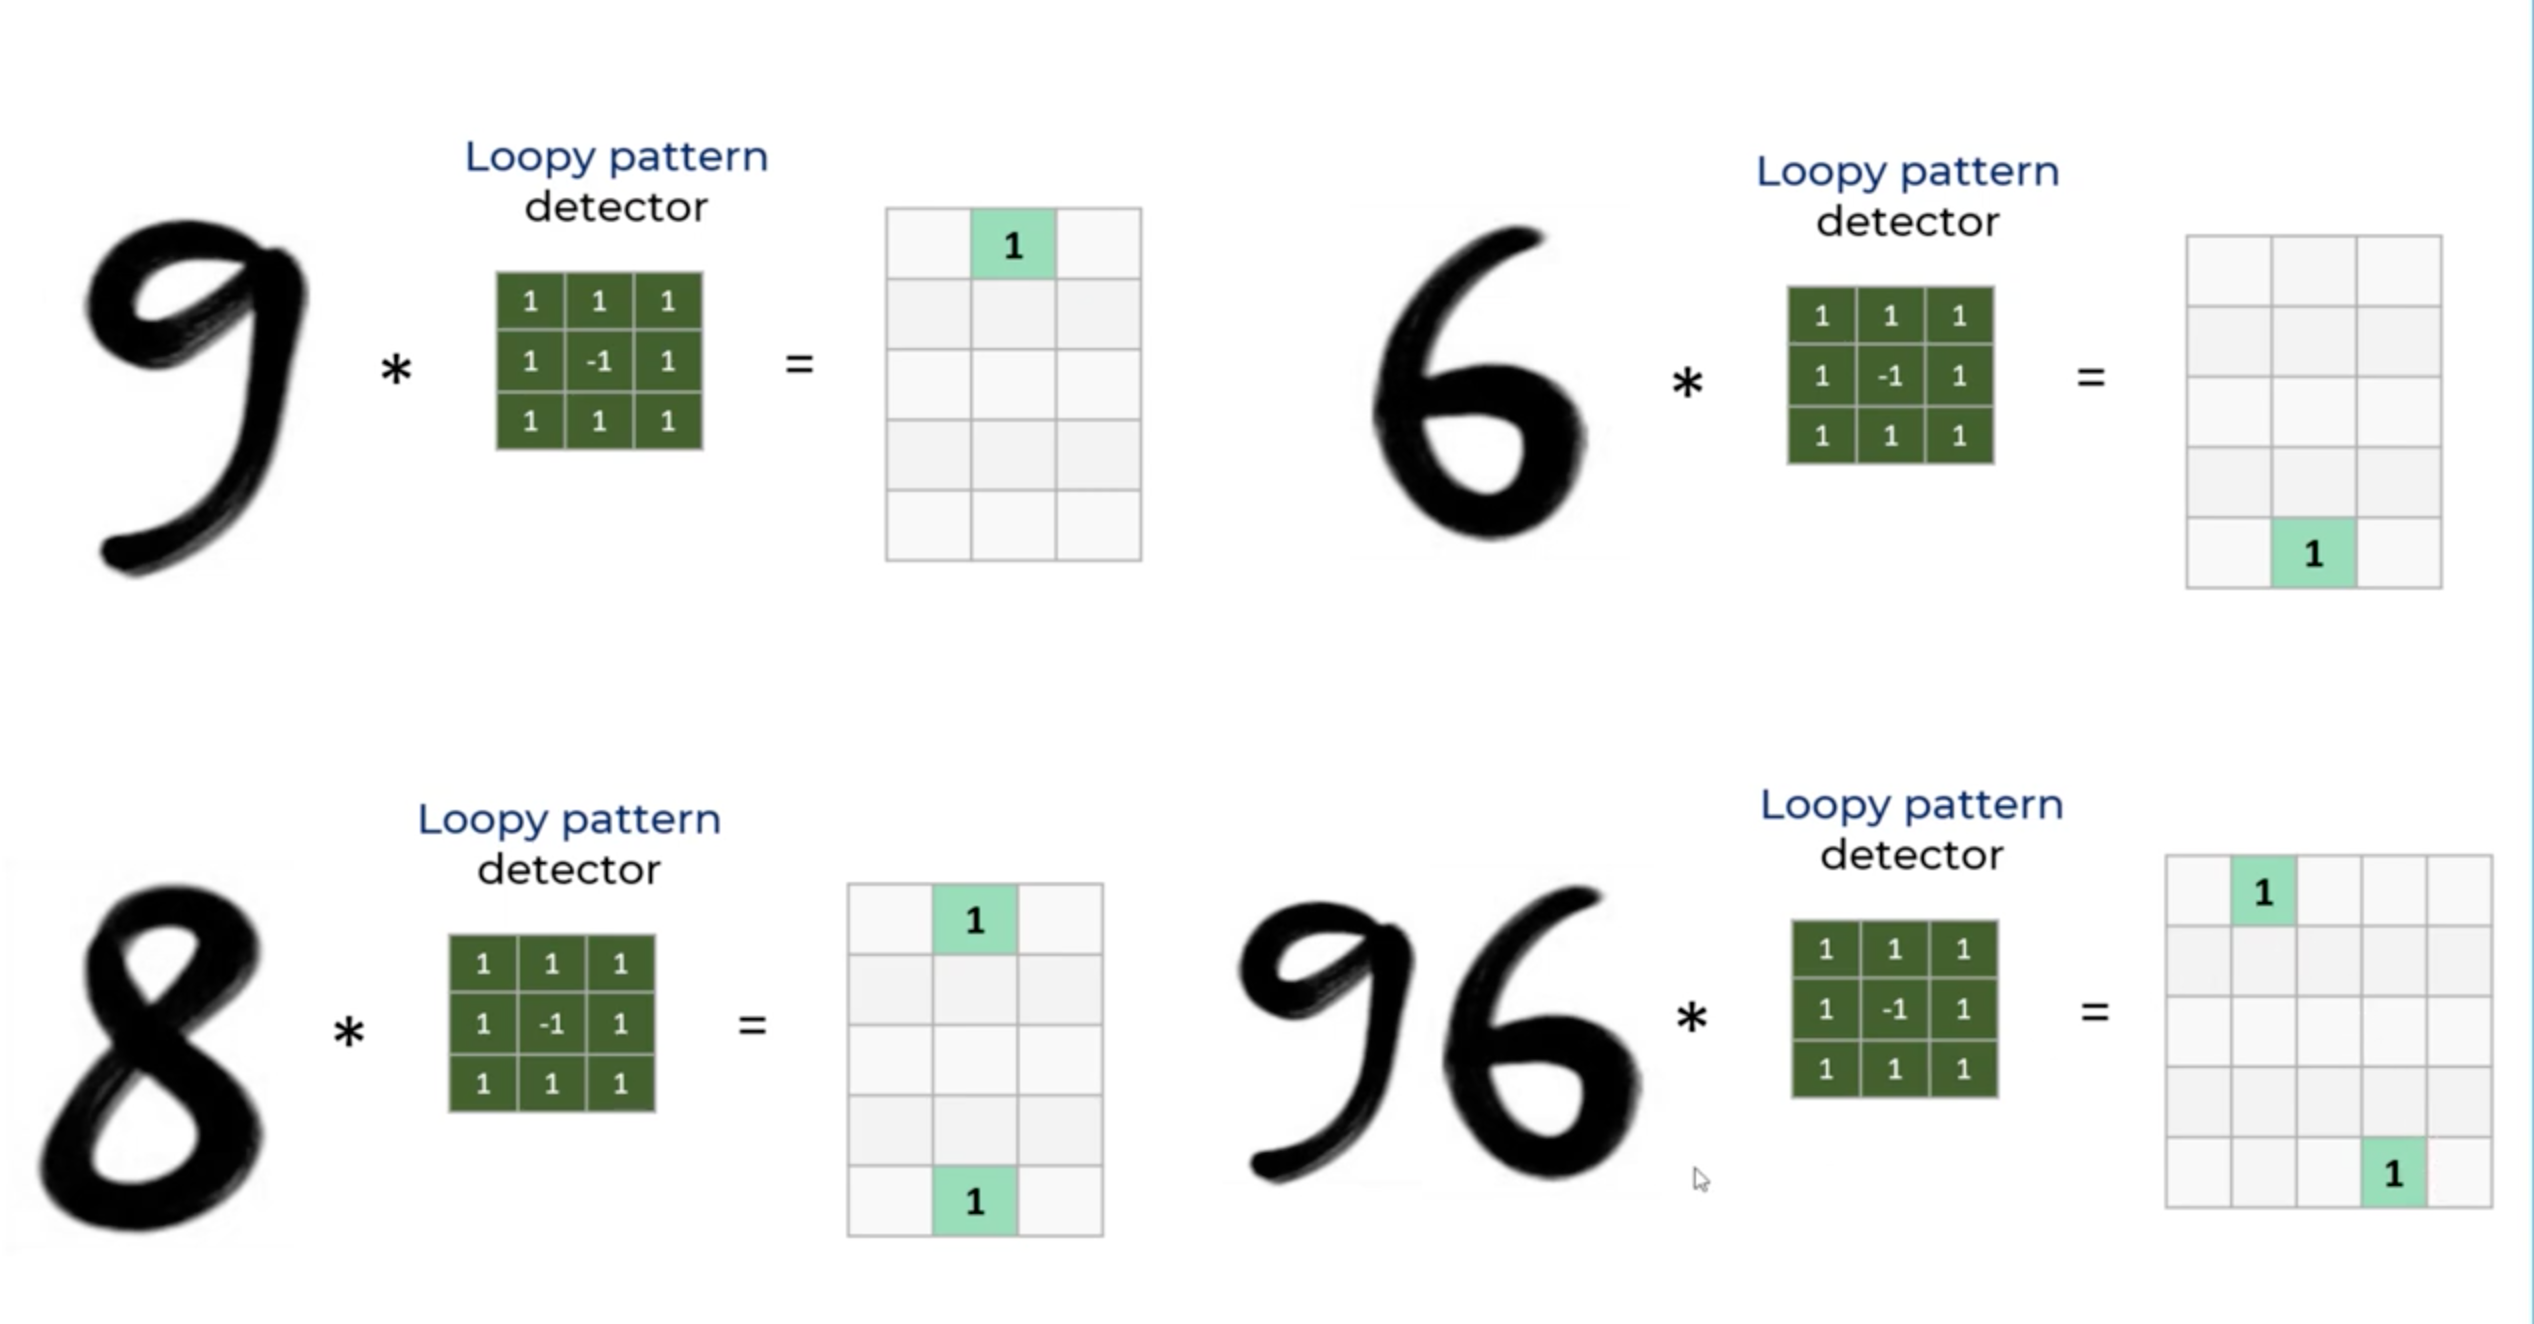

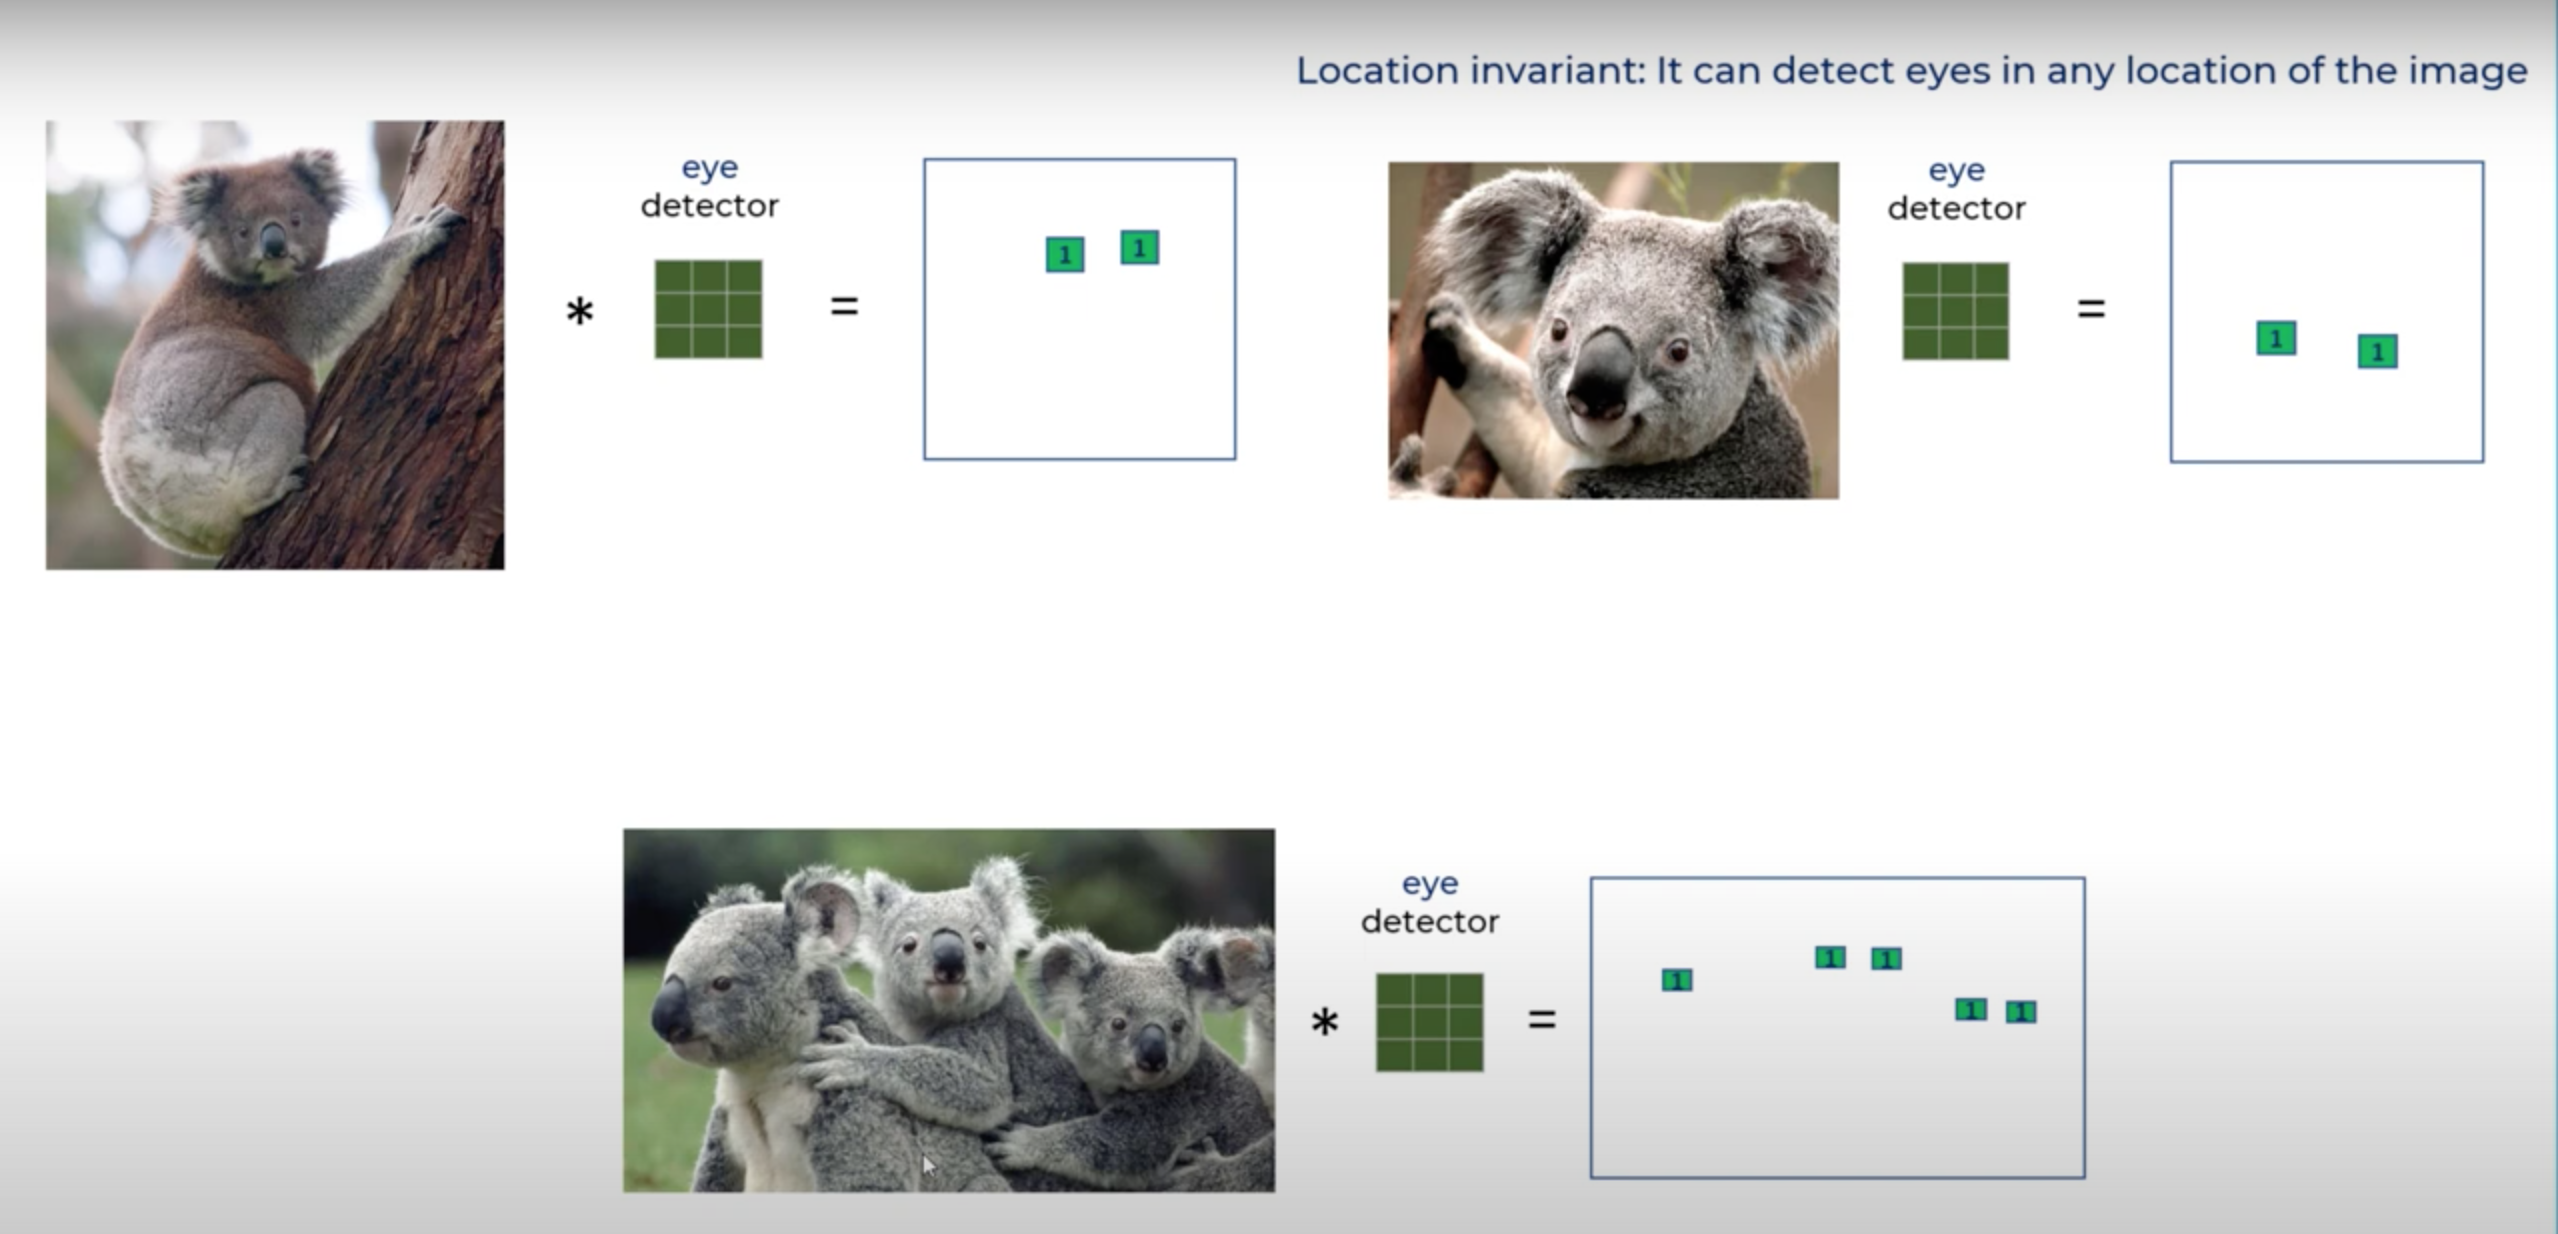

**Step 2: for Feature Extraction**

**Benefits of Pooling**:   eg:  Average Pooling,  Max Pooling  

1)Reduces dimensions and computations

2)Reduces Overfitting as there are less parameters
                     
3)Model is tolerant towards variations and Distortions

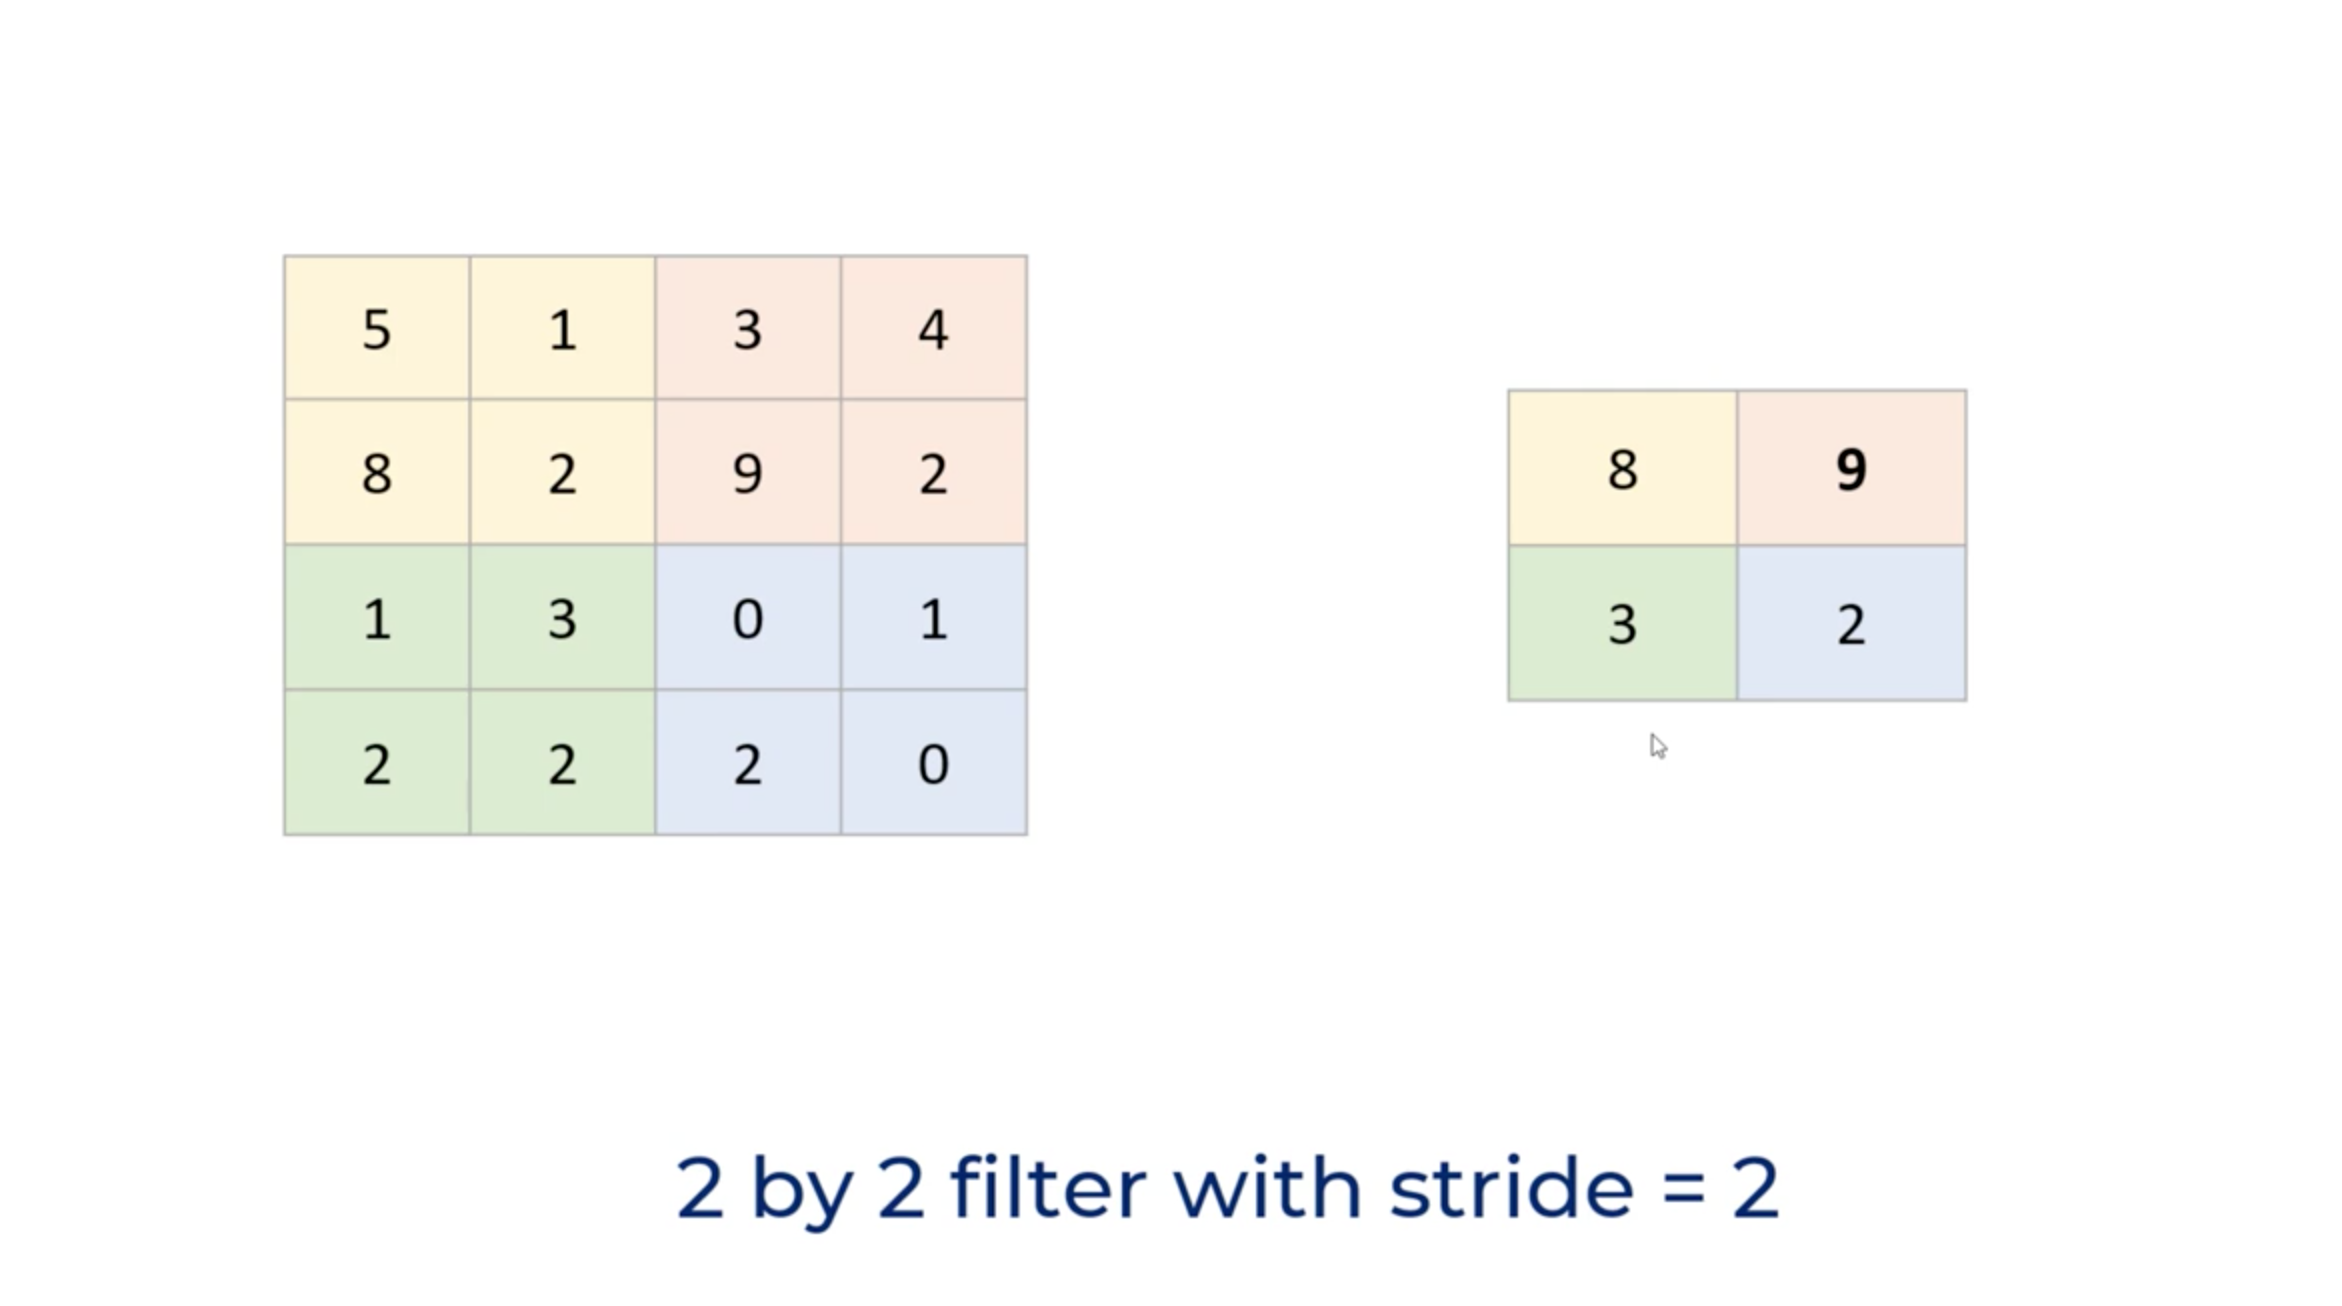

**Complete Feature Extraction**

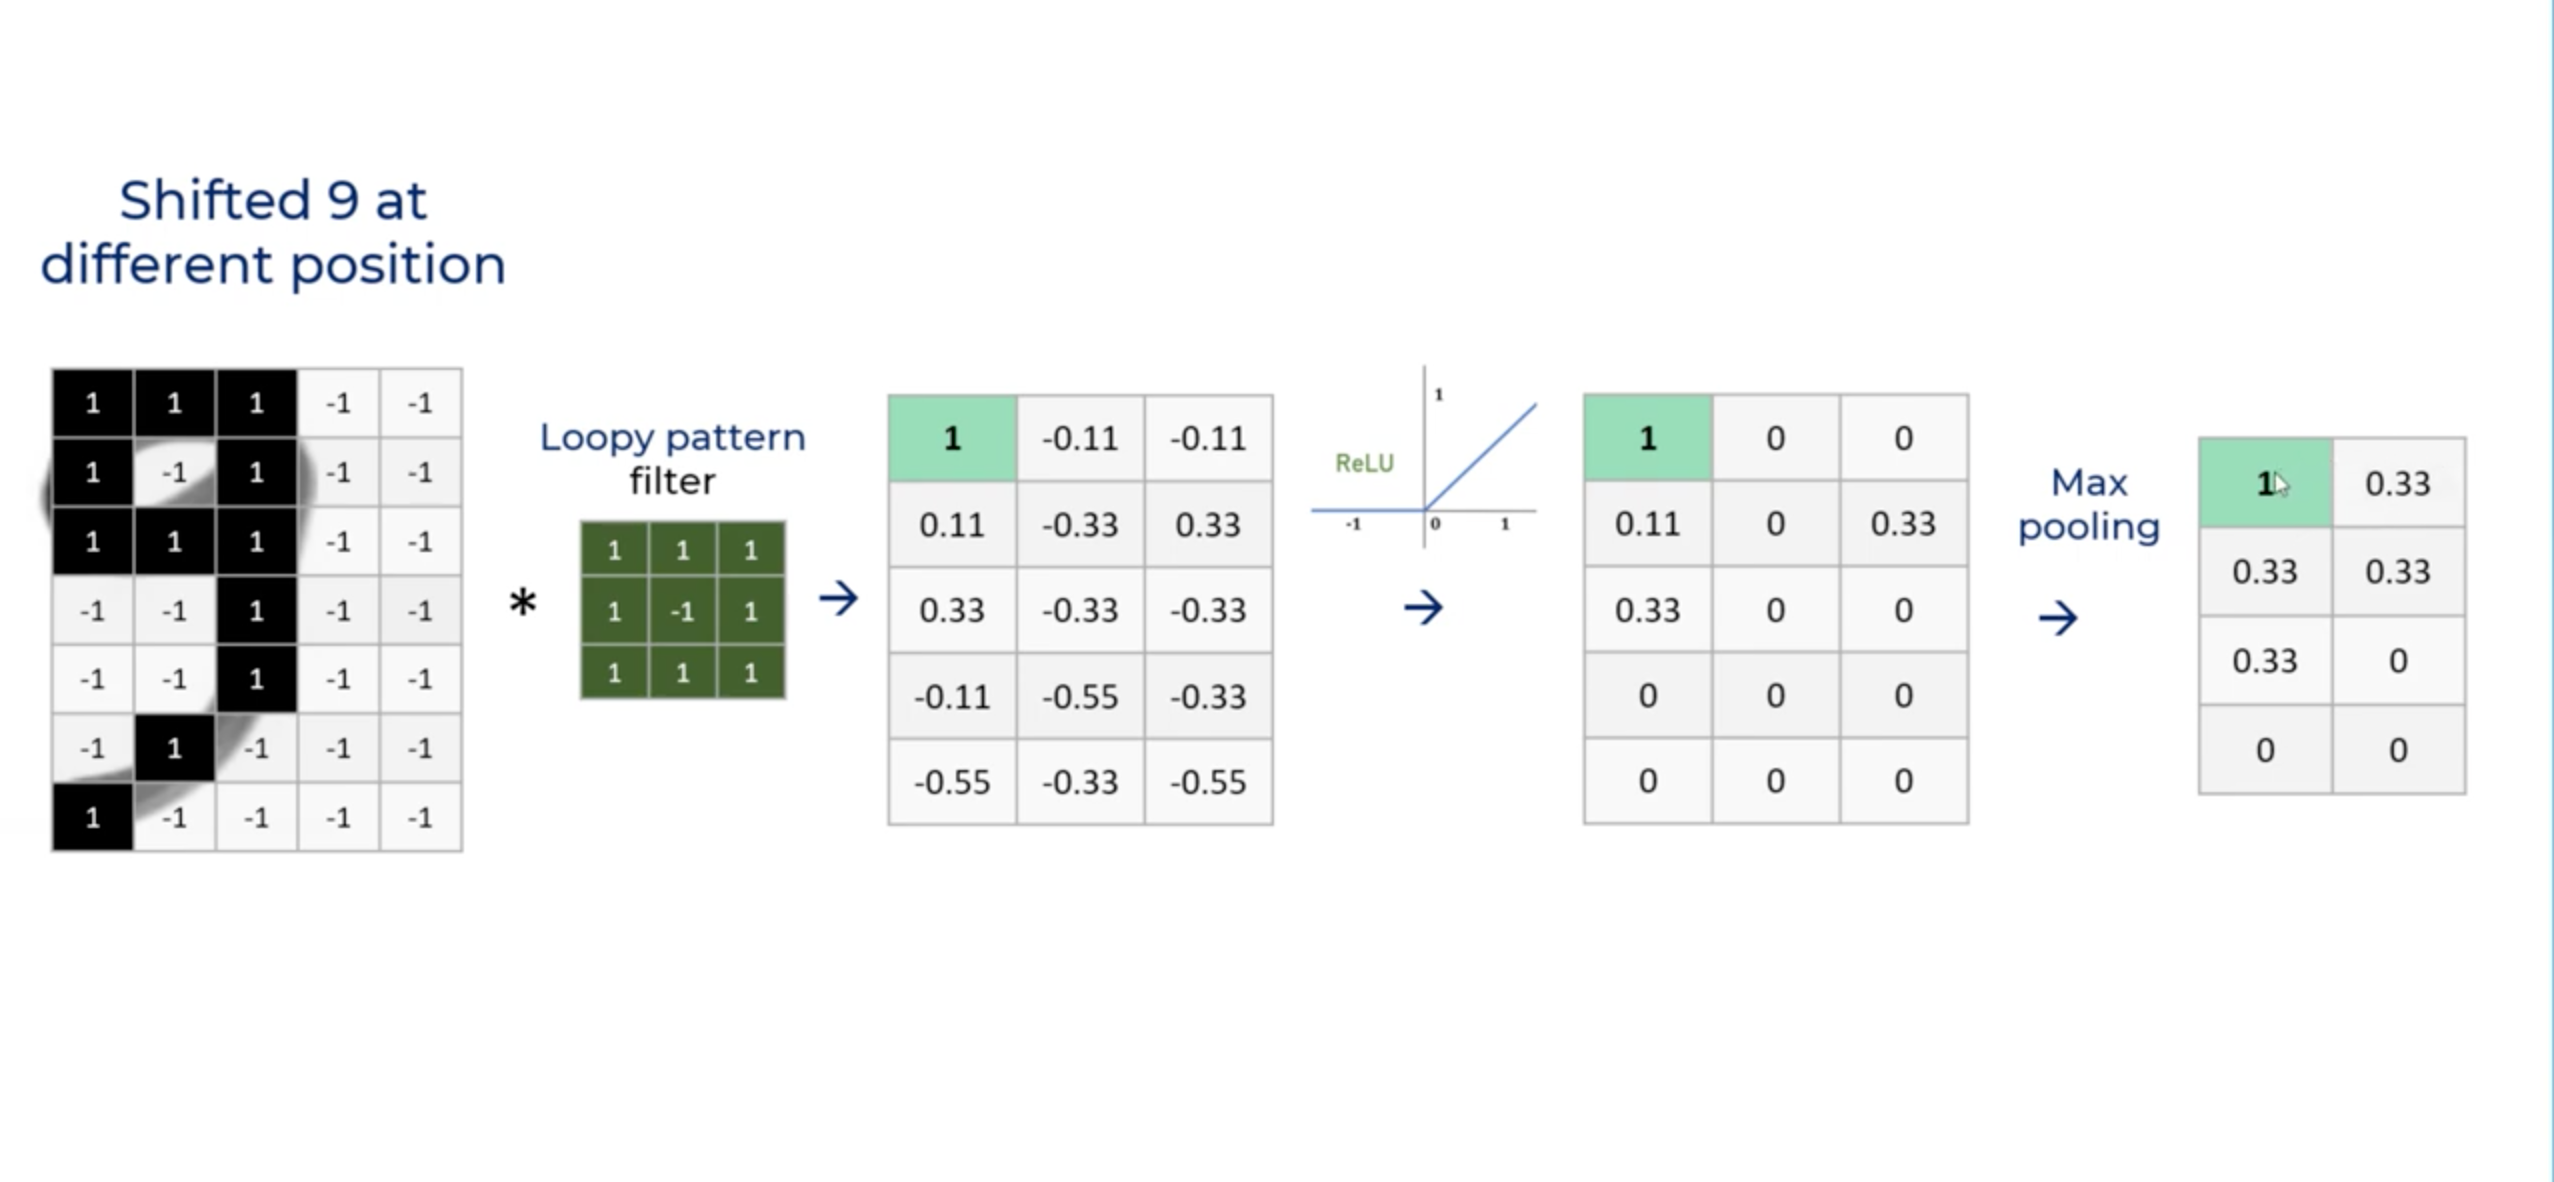

**Now let us build a convolutional neural network to train our images**

In [81]:
cnn = models.Sequential([
    #CNN
    
    #number of filters depend upon hit and trial, however CNN decides the what will be the filters(features) itself.  
    #kernel size-> size of filter(pattern detector)    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)), #32x32 colorful image which makes it 3 channels
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)), #32x32 colorful image which makes it 3 channels
    layers.MaxPooling2D(pool_size=(2,2)),
    
    #dense
    layers.Flatten(),
     #Hidden layer, relu converts negative numbers to 0 and leaves positive numbers as it is
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')   #output layer , softmax normalizes the probability
    ])

In [90]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

**Activation Functions**

**Sigmoid**

class 1: 45

class 2: 67

**Softmax**

1: 45/(45+67)= 0.401

2: 67/(45+67)= 0.598

**here the sum of classes 1 and 2 is 0.401 + 0.598 = 1**

## Complete representation of CNN process
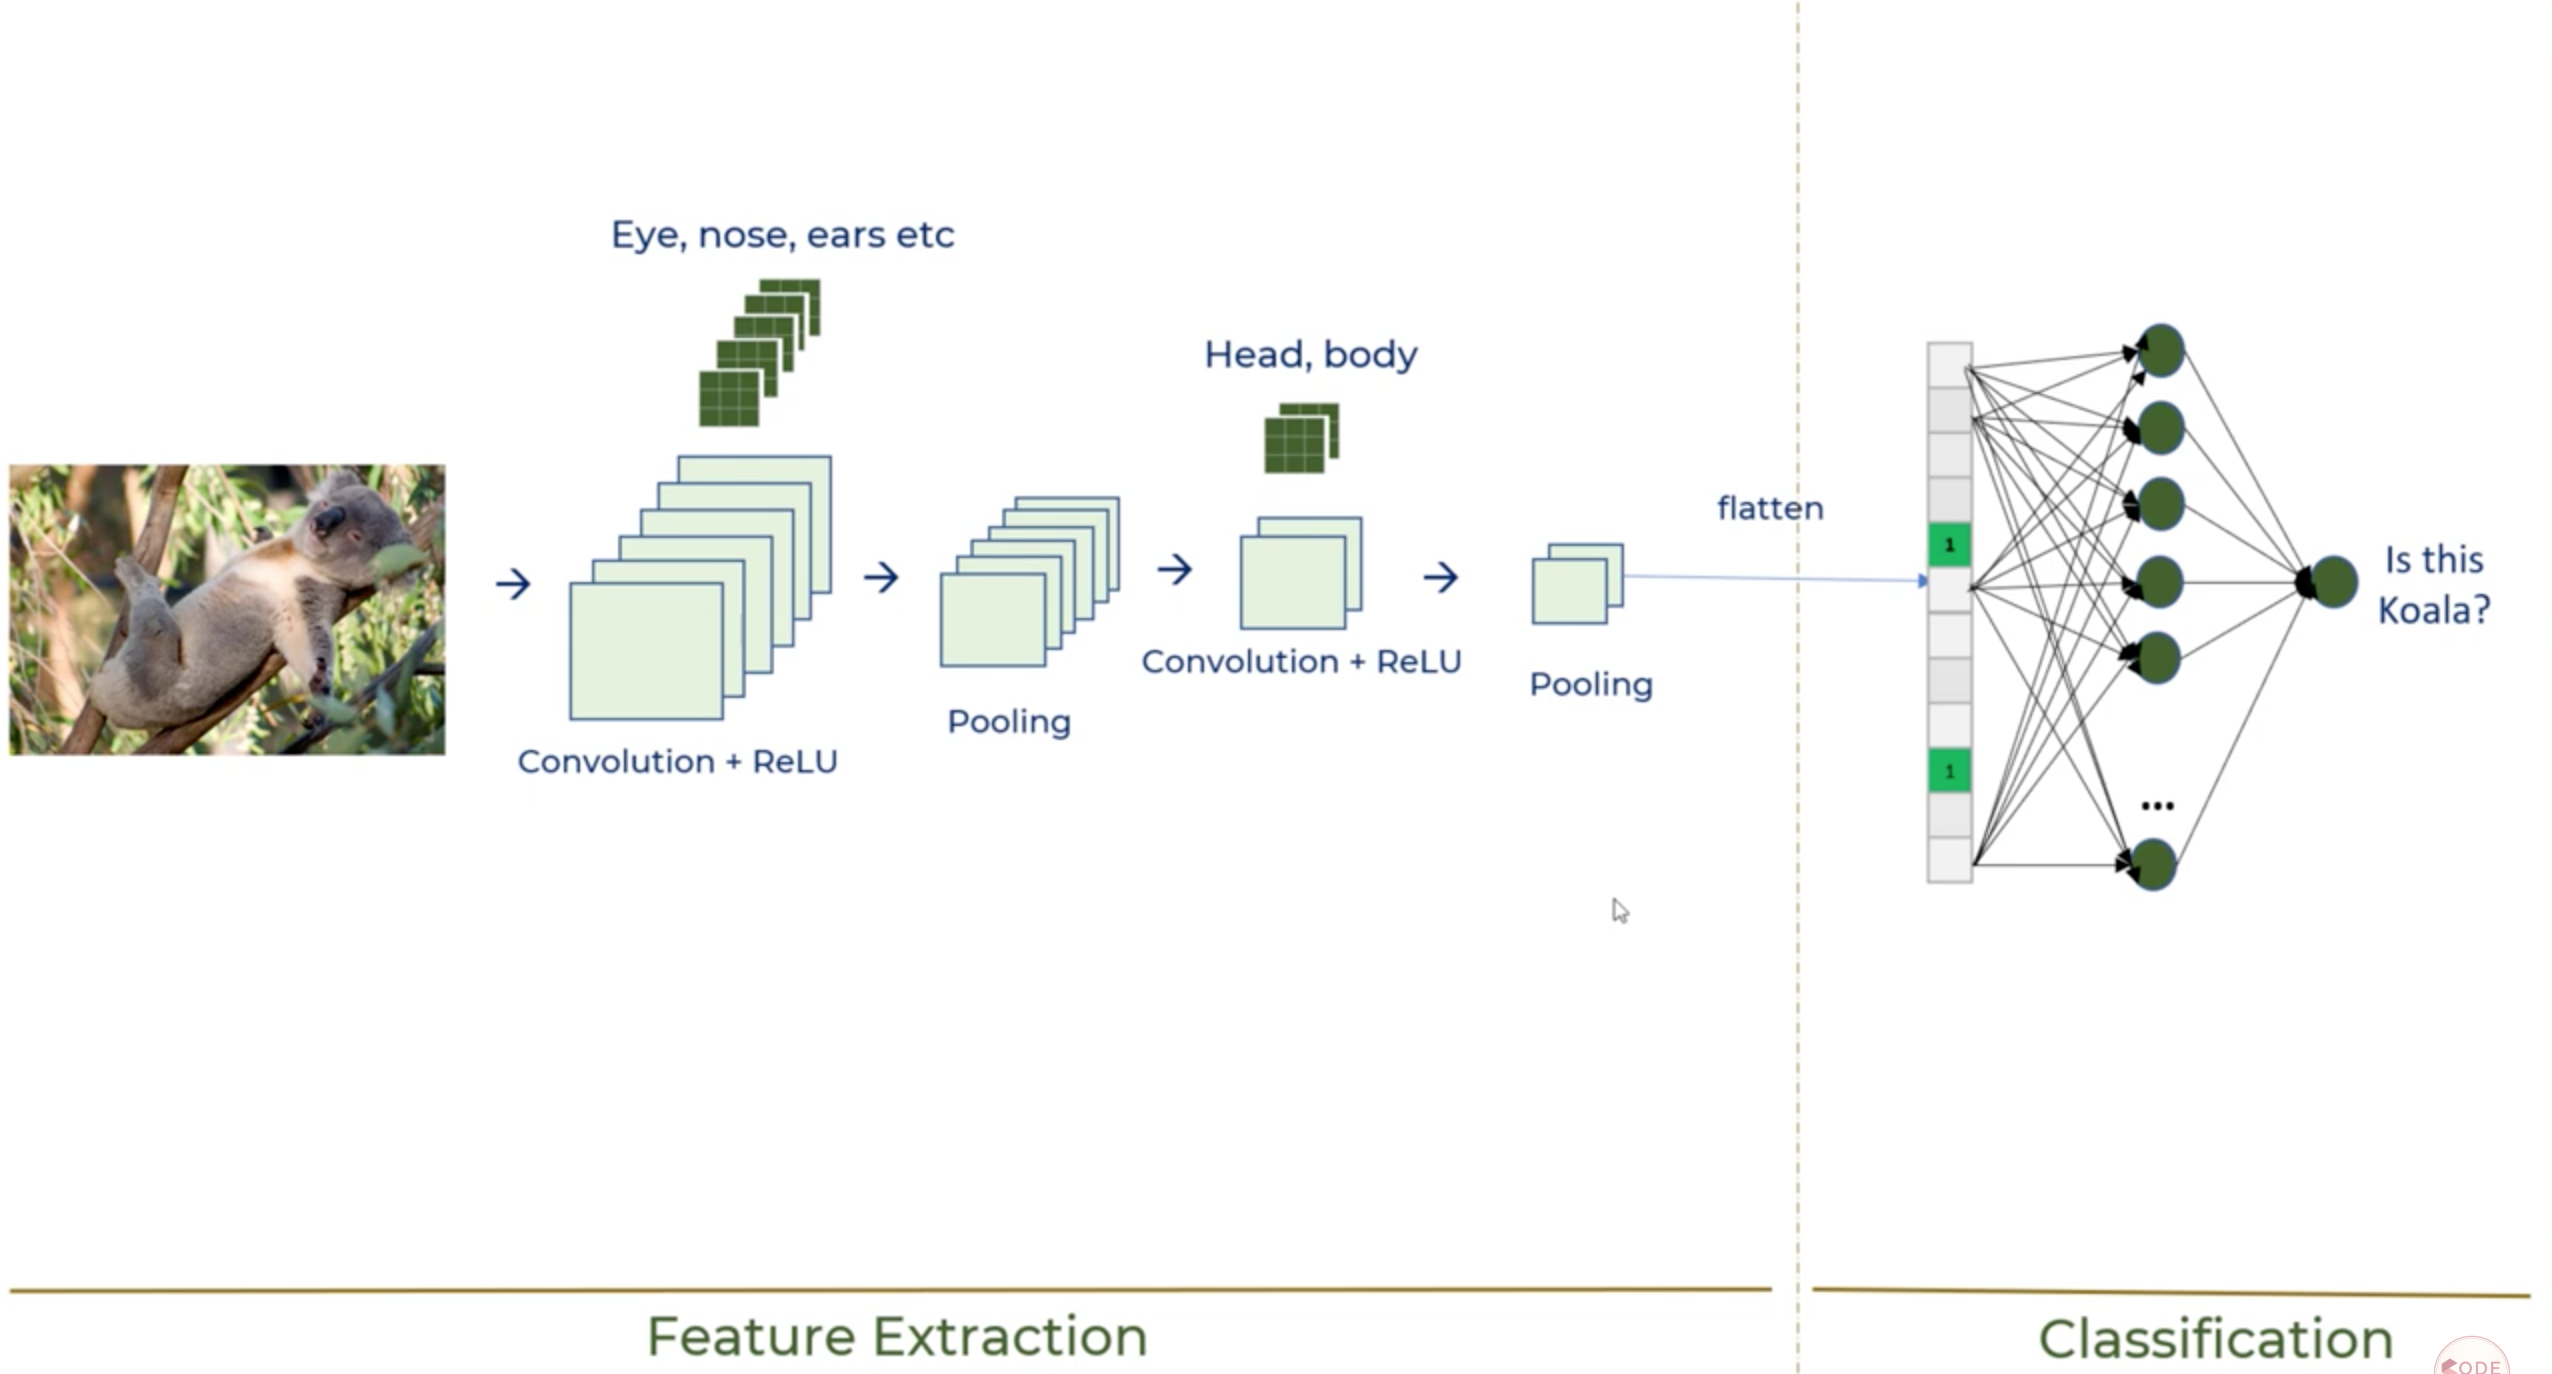

In [91]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4009 - accuracy: 0.4963
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0661 - accuracy: 0.6292
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9270 - accuracy: 0.6792
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8267 - accuracy: 0.7123
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7418 - accuracy: 0.7404
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6715 - accuracy: 0.7671
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6021 - accuracy: 0.7880
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5379 - accuracy: 0.8107
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4778 - accuracy: 0.8328
Epoch 10/10
1563/1563 [==============================] - 32s 20m

In [92]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0561 - accuracy: 0.6865


[1.0561130046844482, 0.6865000128746033]

**With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**


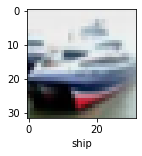

In [94]:
plot_sample(X_test,y_test,1)

In [115]:
y_pred = cnn.predict_classes(X_test)

In [116]:
y_pred[:5]

array([3, 8, 8, 0, 4])

In [117]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

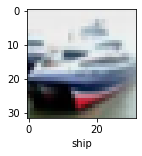

In [118]:
plot_sample(X_test,y_test,1)

In [121]:
classes[y_pred[1]]

'ship'